In [1]:
source('/home/meisl/bin/bin/bin/source.R')


In [3]:
scon = readRDS('conos.myeloid.rds')
load('cell.ano.RData')


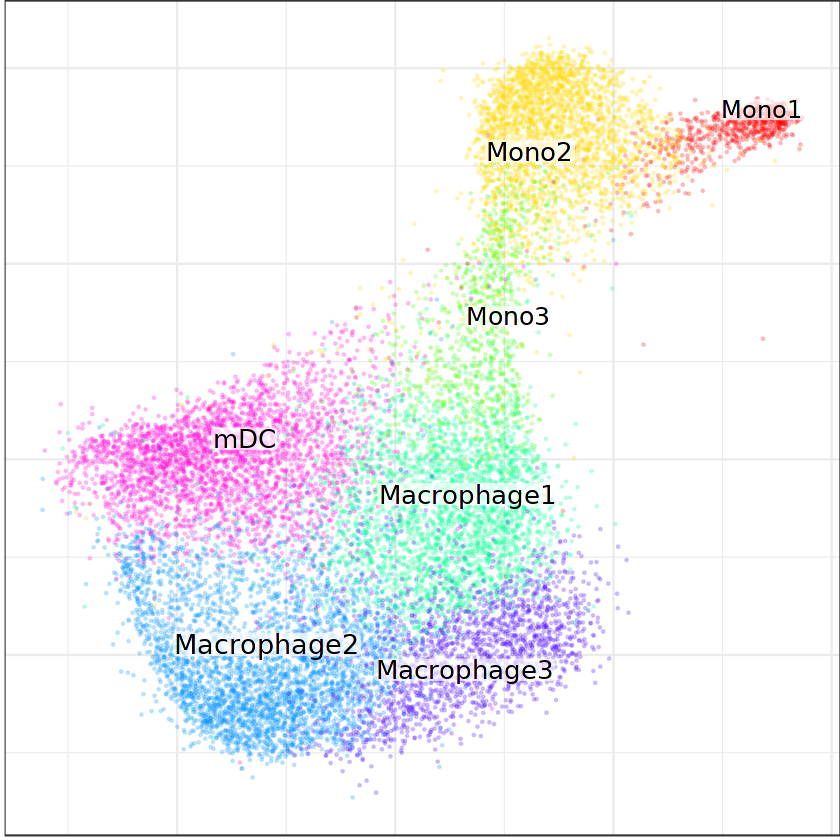

In [4]:
a2=scon$plotGraph(groups=anoM,plot.na=F,size=0.3,alpha=0.2,font.size = c(5, 5.5))
a2

Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Mono1,HP1,0.03014184
2,Mono2,HP1,0.14893617
3,Mono3,HP1,0.07446809
4,Macrophage1,HP1,0.24290780
5,Macrophage2,HP1,0.24822695
6,Macrophage3,HP1,0.05851064


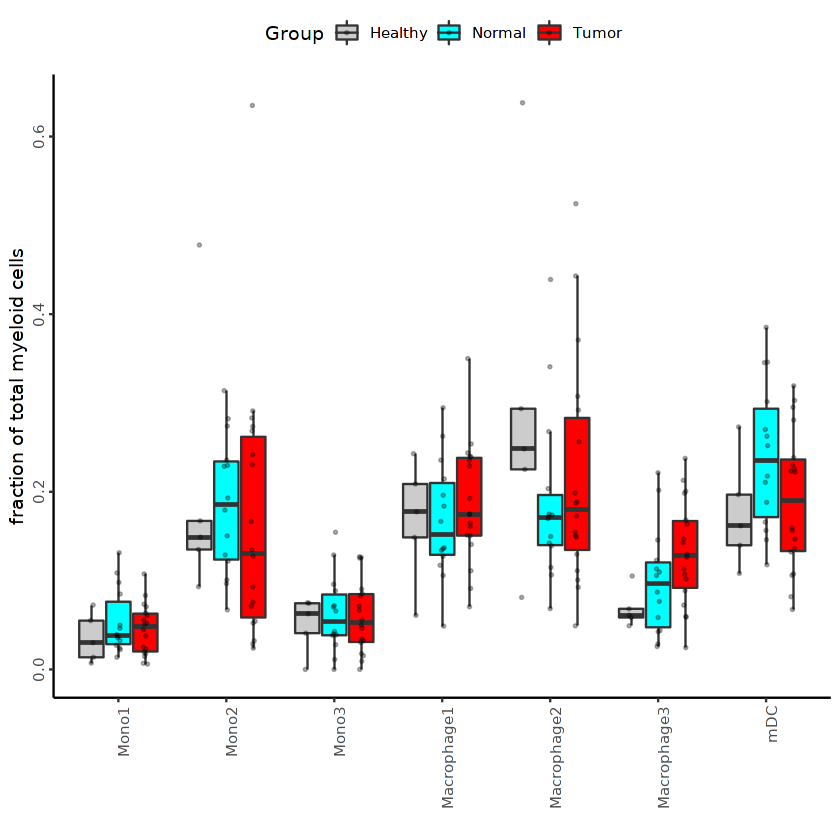

In [5]:
cname=names(anoM)
ano2=data.frame('Cell'=anoM[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total myeloid cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)
p


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




[1]     4 15372

[1] "blue"
[1] "white"
[1] "red"


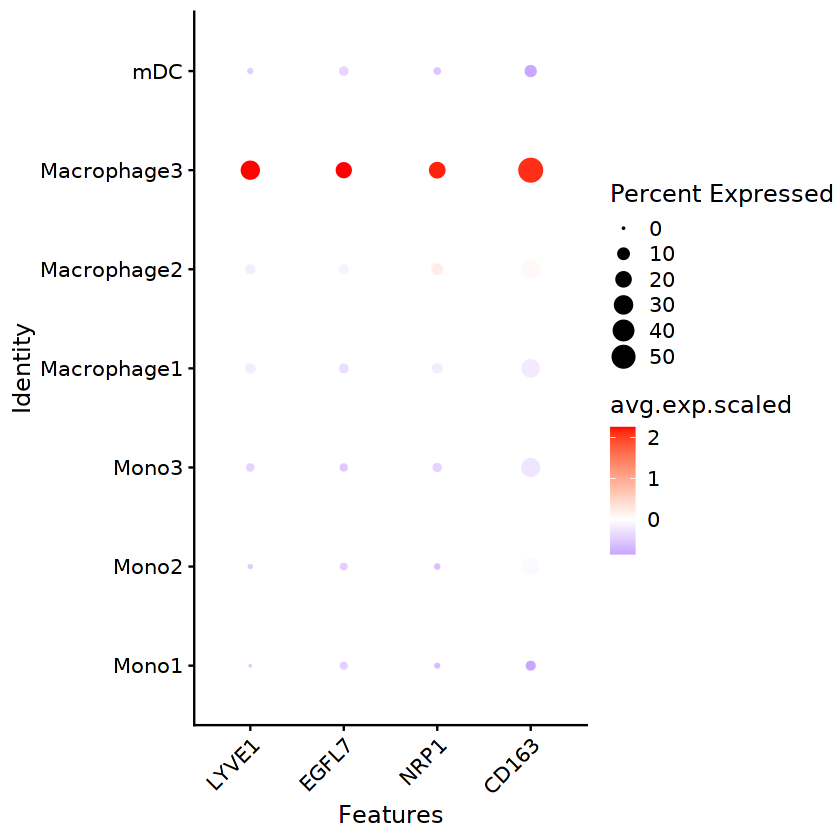

In [6]:
gs=c("CD163",'NRP1','EGFL7','LYVE1')#,'IL10','CD163','CCL20','CCL4')

anoT=as.factor(anoM)
library(cowplot)

cname=names(anoT)


aexp <- do.call(rbind,lapply(sn(gs),function(gene) conos:::getGeneExpression(scon,gene)))
aexp[is.na(aexp)]=0
dim(aexp)

gs=intersect(gs,rownames(aexp))
#cname=intersect(cname,colnames(aexp))
p=Dotfig(gs,aexp[,cname],anoT[cname],cols = c("blue","white", "red"))
p

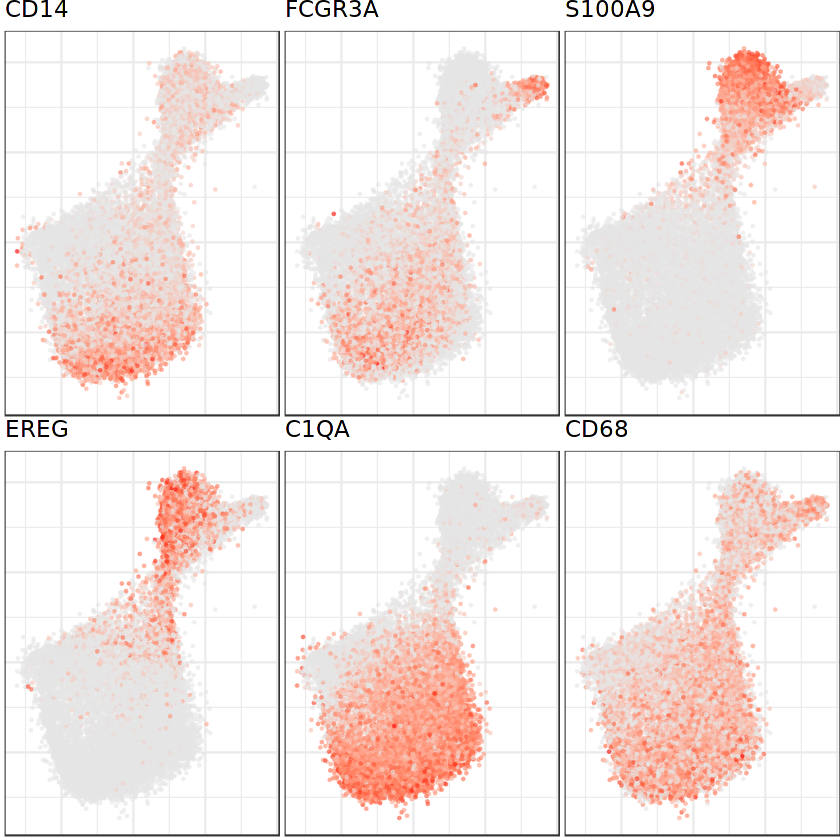

In [7]:
gs=c("CD14",'FCGR3A','S100A9','EREG','C1QA','CD68','CD1C','CD163','SEPP1')#,'IL10','CD163','CCL20','CCL4')
lis=lapply(scProcess:::sn(gs),function(x) scon$plotGraph(gene=x,title=x,size=0.3,alpha=0.5))

b=  cowplot::plot_grid(plotlist=lis, ncol=3, nrow=2)
b       

[1] "CEBPB"  "IL10"   "NOS2"   "RORC"   "S100A8" "SOCS1"  "SOCS3"  "TGFB1" 
 [9] "ILB"    "IL6"    "CSF2"   "CSF1"   "IDO"    "FLT3LG" "ARG1"   "PTGS2" 
[17] "VEGFA"  "TNFA"   "S100A9" "CYBB"   "NCF1"   "NCF4"   "CSF3R"  "IL8"   
[25] "MNDA"   "LYZ"    "NCF2"   "SELL"   "ICAM1"  "CD63"   "CD274"  "OLR1"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.04159 0.06365 0.07263 0.09426 0.28642 


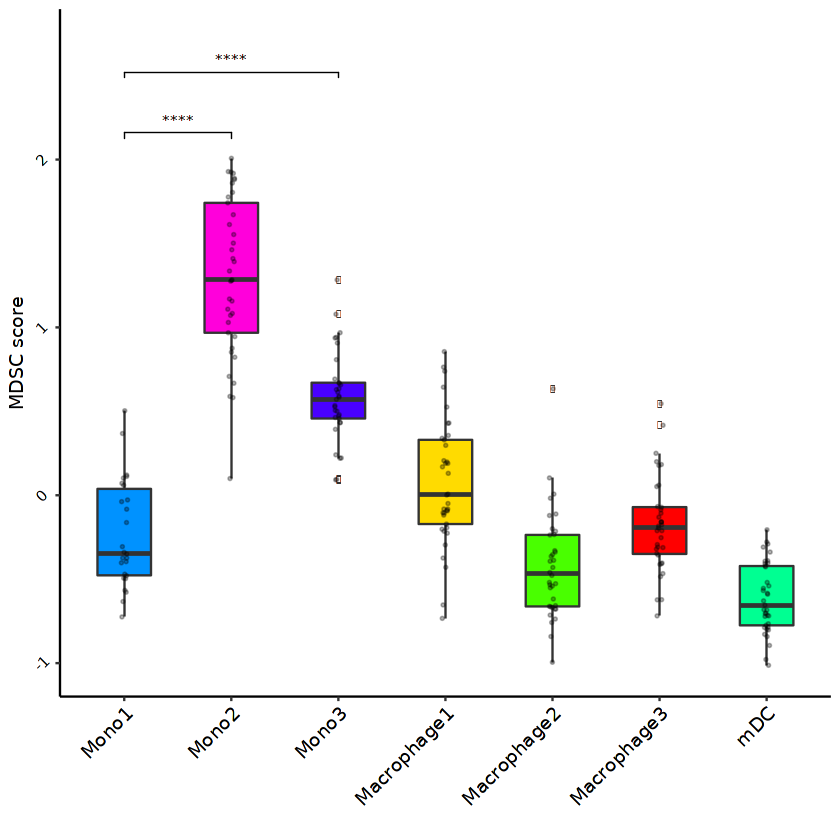

In [9]:
options(warn = -1)
# MDSC score 
ylab='MDSC score'

gs=read.csv('MDSC.txt',sep='\t',header=F)

gs=as.character(gs[,1])
gs=toupper(gs)
gs=unique(gs)
gs

df=Signature_score(anoM[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)
p5 = drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.35,height=2.7,width=2.4,sigl=c('Mono1', 'Mono2', 'Mono3'))
p5

[1] "CTSS"     "HLA-A"    "HLA-B"    "HLA-C"    "HLA-DMA"  "HLA-DMB" 
 [7] "HLA-DOA"  "HLA-DOB"  "HLA-DPA1" "HLA-DPB1" "HLA-DQA1" "HLA-DQA2"
[13] "HLA-DQB1" "HLA-DQB2" "HLA-DRA"  "HLA-DRB1" "HLA-DRB3" "HLA-DRB4"
[19] "HLA-DRB5" "HLA-E"    "HLA-F"    "HLA-G"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2069  0.3116  0.2933  0.3856  0.7379 


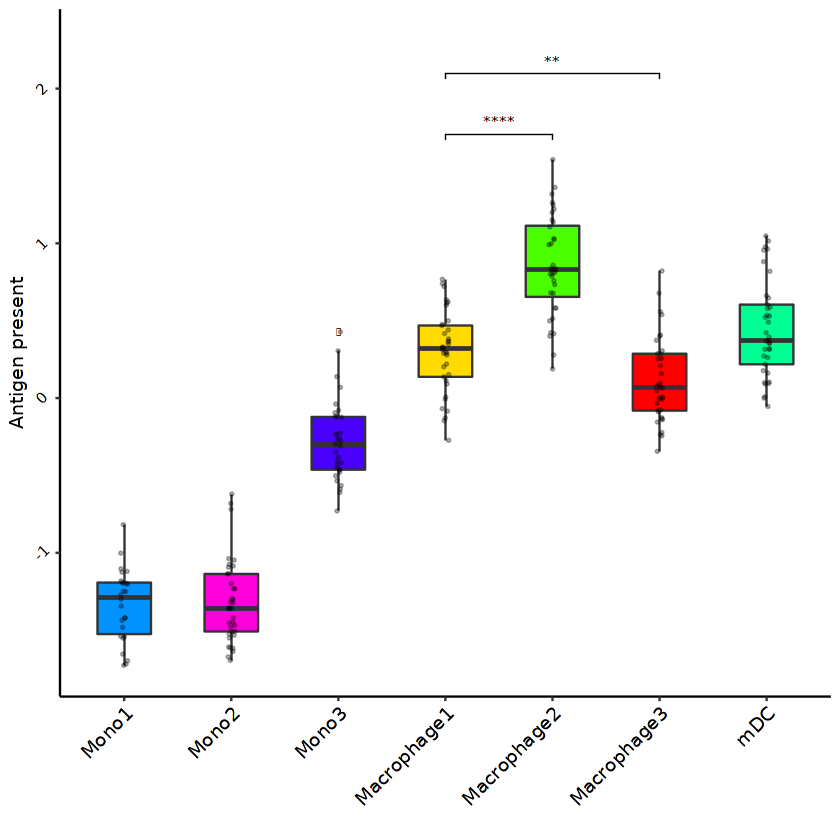

In [11]:
options(warn = -1)

# Antigen presenting 
ylab='Antigen present'
cname=names(anoM)
gs=read.csv('HLA.gene.txt')[,1] %>% as.character()
gs

gs = gs[grepl('HLA-D',gs)]
gs = c(gs,'CD74')

df=Signature_score(anoM[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)
p4 = drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.5,height=2.7,width=2.4,sigl=c('Macrophage1', 'Macrophage2', 'Macrophage3'))
#h4 = runHeatMap(gs,sp2,anoM,stype,ylab)
p4

[1] "SEPP1"     "IGF1"      "APOE"      "HEXA"      "CPM"       "SDC3"     
  [7] "TMEM135"   "SCARB1"    "AKR1B1"    "TSPAN4"    "CXCL12"    "APOC1"    
 [13] "ABCA1"     "ALDH1A1"   "PER3"      "SPP1"      "C1QA"      "LILRB5"   
 [19] "LGALS3BP"  "FOLR2"     "CTSD"      "PLTP"      "EPAS1"     "OSBPL1A"  
 [25] "PIK3IP1"   "CD59"      "KCNMA1"    "GNPDA1"    "SUCLG2"    "ITSN1"    
 [31] "CD28"      "TLR7"      "PLD3"      "SIGLEC1"   "ABCG1"     "ACP5"     
 [37] "PRKACB"    "IDH1"      "SLC22A18"  "MRC1"      "TNFRSF21"  "ATP8A1"   
 [43] "GYPC"      "ABCC5"     "RNASET2"   "GATM"      "EPHX1"     "HGF"      
 [49] "VAT1"      "DNASE2"    "CTSA"      "WLS"       "BDH2"      "BLNK"     
 [55] "ACY1"      "ITGB5"     "NUPR1"     "FXYD6"     "C14orf159" "MFHAS1"   
 [61] "TCN2"      "MAF"       "F13A1"     "RAD51AP1"  "MS4A6A"    "GM2A"     
 [67] "IGFBP4"    "SCPEP1"    "FRMD4B"    "ATP6V0E2"  "CRTAP"     "SLCO2B1"  
 [73] "SDS"       "MSR1"      "CTSF"      "SLC38A6"   "HEXB"      "TMEM251"  
 [79] "CD209"     "RHOBTB1"   "DBP"       "PDK3"      "DYRK4"     "BLVRB"    
 [85] "HTR2B"     "CACNA2D3"  "DENND2D"   "HS3ST2"    "MGST2"     "TIMP2"    
 [91] "DISC1"     "NDRG3"     "TRIM32"    "WWP1"      "IRF8"      "PLD1"     
 [97] "VWA5A"     "STARD13"   "AP1B1"     "GDF15"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01863 0.03007 0.03605 0.04855 0.17528 


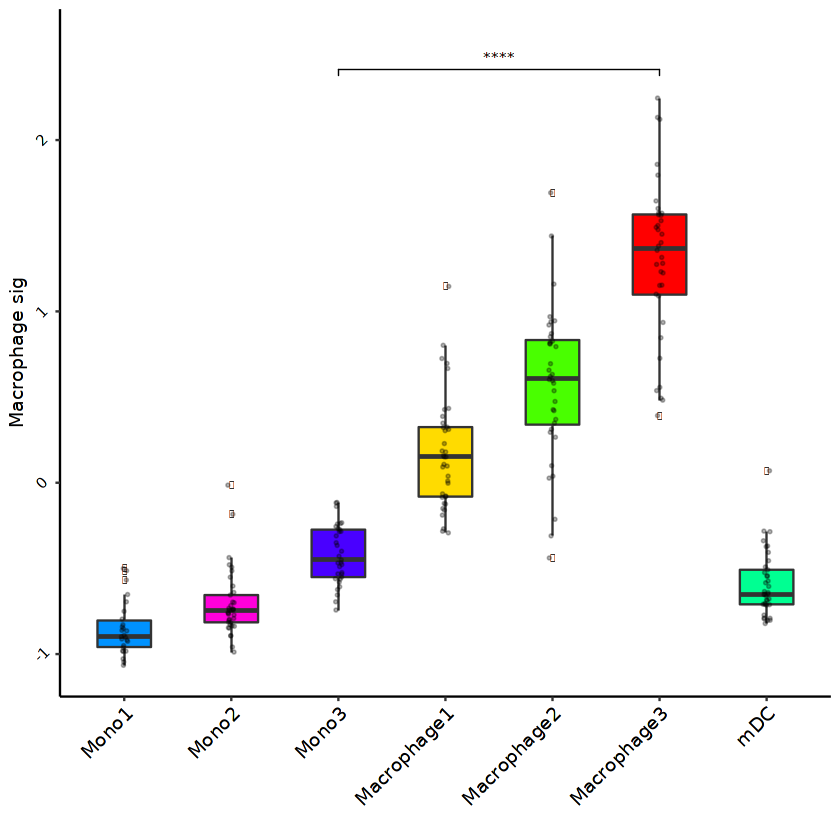

In [13]:
# Monocytes signature
ylab='Macrophage sig'
cname=names(anoM)
anoM = as.factor(anoM)
gs=glist$GSE5099_Macro
gs

df=Signature_score(anoM[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)
p2=drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.15,height=2.7,width=2.4,sigl=c('Mono3' ,'Macrophage3'))
p2
#h2 = runHeatMap(gs,sp2,anoM,stype,ylab)


[1] "EREG"      "FCN1"      "FYN"       "MARCKSL1"  "APOBEC3A"  "FRY"      
  [7] "DUSP6"     "CCR7"      "CLEC5A"    "ALCAM"     "S100A12"   "SLC7A11"  
 [13] "LAMP3"     "OLR1"      "IER5"      "ARAP3"     "CCR2"      "PDLIM7"   
 [19] "VDR"       "FLNA"      "TREM1"     "CD101"     "APOBR"     "CST6"     
 [25] "RNF24"     "ETV6"      "ORMDL2"    "STK17B"    "HDGFRP3"   "TES"      
 [31] "PNP"       "PPBP"      "BTG2"      "TRAF1"     "CFP"       "PLP2"     
 [37] "CST7"      "DSE"       "VCAN"      "LRP8"      "PLAC8"     "NRGN"     
 [43] "SNORA64"   "HIST2H2BE" "CRIP1"     "CGGBP1"    "MSC"       "EMR2"     
 [49] "IL3RA"     "IDO1"      "NETO2"     "NAB1"      "PF4"       "GNG11"    
 [55] "S100A6"    "S100A8"    "KCNN4"     "CYTIP"     "DUSP1"     "CCR5"     
 [61] "ORAI2"     "DDX21"     "MICALL2"   "FUBP1"     "DNAJB5"    "DGKA"     
 [67] "TCIRG1"    "EMP3"      "RBM14"     "S100A10"   "HOMER2"    "QPCT"     
 [73] "UCK2"      "NR4A3"     "AQP9"      "DUSP2"     "HMGCR"     "FHOD1"    
 [79] "SLC16A6"   "RASAL1"    "PTPRE"     "S100P"     "DUSP5"     "PPM1F"    
 [85] "OLFM1"     "CAPN2"     "RNF41"     "HMGN4"     "HIST1H2BK" "REL"      
 [91] "DIAPH1"    "ARNTL"     "HMGCS1"    "IRAK3"     "LST1"      "HCP5"     
 [97] "CD58"      "PITPNM1"   "ACVR2A"    "SLC39A8"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02813 0.04046 0.04474 0.05830 0.15213 


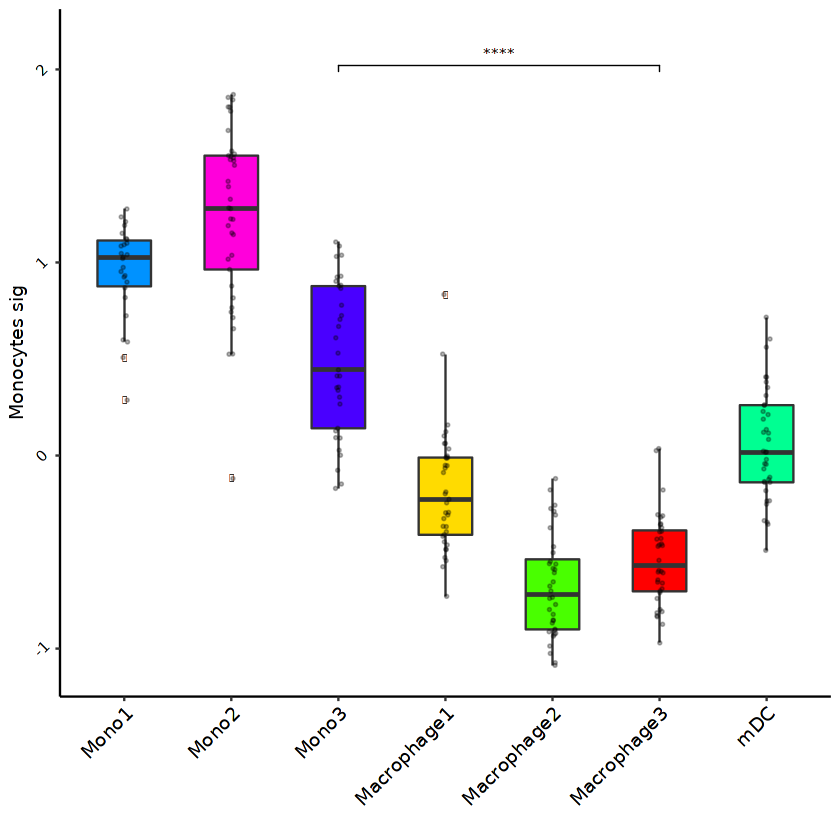

In [12]:
# Monocytes signature
ylab='Monocytes sig'
cname=names(anoM)
anoM = as.factor(anoM)
gs=glist$GSE5099_Mono
gs

df=Signature_score(anoM[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)
p1=drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.15,height=2.7,width=2.4,sigl=c('Mono3' ,'Macrophage3'))
#h1 = runHeatMap(gs,sp2,anoM,stype,ylab)
p1

In [15]:
# M2 score 
ylab='M2 score '
cname=names(anoM)
gs=glist$M2

df=Signature_score(anoM[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)
p6 = drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.35,height=2.7,width=2.4,sigl=c('Macrophage1', 'Macrophage2', 'Macrophage3'))

#h6 = runHeatMap(gs,sp2,anoM,stype,ylab)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02396 0.03766 0.04101 0.05483 0.18633 


In [ ]:
print('signature genes')
gs1 = c("FCN1","FYN","S100A10","S100A6", "S100A8",'TREM1')
gs2 = c( "APOE" ,"APOC1",'C1QA','SEPP1','CTSF','CTSD','FOLR2')
gs3 = c( "EREG"  ,  "IL1B" ,  "PDE4B" ,  "PTGS2" ,"G0S2" ,"IL8" ,"OSM","CCL20","AQP9" )
gs4 =c( "HLA-DMA" , "HLA-DMB" , "HLA-DOA", "HLA-DOB" , "HLA-DPA1","HLA-DPB1", "HLA-DRA", "HLA-DRB5")
gs5 = c("S100A8","SELL","CEBPB","LYZ" ,"VEGFA","TGFB1","CSF3R","SOCS3","NCF2" )

M2 = c('CSF1R','MSR1','VEGFB','MMP14','TGFB3','ARG2','CD163','LYVE1','CCL13')
M1 = c('IL1A','IL1B','CXCL10','CXCL11','CD80','CD40','CCL5','IRF1')


ll = unlist(lapply(list(gs1,gs2,gs3,gs4,gs5,M2,M1),length))
ll2 =unlist(lapply(sn(seq(6)),function(x) sum(ll[1:x])))


x=rbind(h1$exp[gs1,],h2$exp[gs2,],h3$exp[gs3,],
        h4$exp[gs4,],h5$exp[gs5,],h6$exp[M2,],h7$exp[M1,])

                   annot=h1$ano
annot$fraction = 'Healthy'
annot[grepl('Normal',rownames(annot)),'fraction'] = 'Normal'
annot[grepl('Tumor',rownames(annot)),'fraction'] = 'Tumor'
colnames(annot) = c('cell','fraction')

annot$cell = ordered(as.factor(annot$cell),levels = levels(anoM))
annot$fraction = ordered(as.factor(annot$fraction),levels = levels(stype))

o = order(annot$cell,annot$fraction)
x = x[,o]

start.chrom=h1$start.chrom

aka3 = list(cell= anoM.pal,fraction = fraction.palette1)



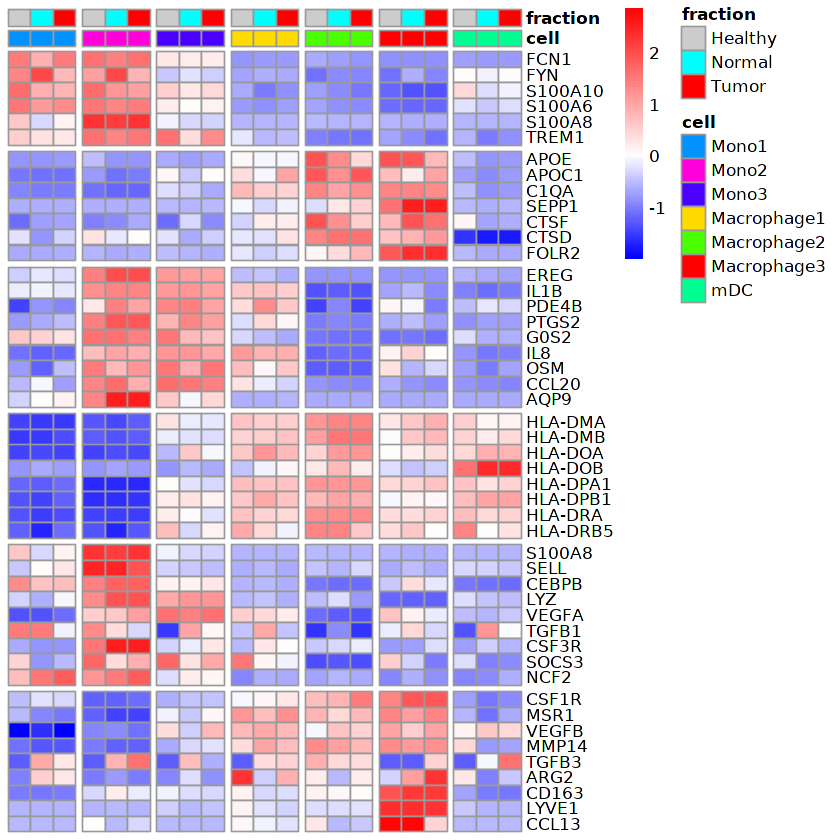

In [14]:
pheatmap(x,annotation_col = annot,show_rownames = T,show_colnames = F,annotation_colors = aka3,
            fontsize_col=5,gaps_col  = start.chrom,gaps_row = ll2,
            cluster_rows = FALSE, cluster_cols=FALSE,color=rgb.palette(100),
            breaks = c(seq(min(x),-0.01,length.out = 50),seq(0.01,max(x),length.out = 50)))

